<a href="https://colab.research.google.com/github/harshs-data/Machine-Learning/blob/main/Task_PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### `Task` How dimensionality reduction using Principal Component Analysis (PCA) on the Wine Quality dataset contributes to improving the classification accuracy and efficiency of wine type.

Note : Use KNN for Classification.

Data Link :  [Wine Data](https://docs.google.com/spreadsheets/d/e/2PACX-1vQDVwxneOKOaJL13QMhkAhYrgWlH1tICY7RacUnj_lL8m9uUWaaUf3p7bScNyh_D2Rvt7nc1q11adSy/pub?gid=647503637&single=true&output=csv)

In [66]:
# Data Loading
import pandas as pd
wine_data_path = "https://docs.google.com/spreadsheets/d/e/2PACX-1vQDVwxneOKOaJL13QMhkAhYrgWlH1tICY7RacUnj_lL8m9uUWaaUf3p7bScNyh_D2Rvt7nc1q11adSy/pub?gid=647503637&single=true&output=csv"
wine = pd.read_csv(wine_data_path)
wine.head(5)

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [70]:
X = wine.drop("type", axis=1)
y = wine["type"]

In [78]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state=42)

In [82]:
import numpy as np
import pandas as pd

X_train = X_train.dropna()
y_train = y_train.loc[X_train.index]
X_test = X_test.dropna()
y_test = y_test.loc[X_test.index]


In [83]:
# knn without pca
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)


In [84]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.9365325077399381

In [87]:
# StndardScalar
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [117]:
# pca
from sklearn.decomposition import PCA
pca = PCA(n_components=None)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)



In [118]:
# knn after pca
knn_pca = KNeighborsClassifier()
knn_pca.fit(X_train_pca, y_train)
y_pred_pca = knn_pca.predict(X_test_pca)


In [119]:
accuracy_score(y_test, y_pred_pca)

0.9914860681114551

In [136]:
# by this loop we get to know that how many pca will required to get best accuracy_score
for i in range(1,13):
  pca = PCA(n_components=i)
  X_train_pca = pca.fit_transform(X_train)
  X_test_pca = pca.transform(X_test)

  knn_pca = KNeighborsClassifier()
  knn_pca.fit(X_train_pca, y_train)
  y_pred_pca = knn_pca.predict(X_test_pca)

  print(i, accuracy_score(y_test, y_pred_pca))

1 0.9806501547987616
2 0.978328173374613
3 0.9806501547987616
4 0.9883900928792569
5 0.9845201238390093
6 0.9868421052631579
7 0.9876160990712074
8 0.9876160990712074
9 0.9883900928792569
10 0.989938080495356
11 0.9914860681114551
12 0.9914860681114551


In [127]:
# eigen value
pca.explained_variance_

array([3.04751795, 2.62235885, 1.64323136, 1.06658382, 0.84257818,
       0.6665525 , 0.5664796 , 0.52362914, 0.46166105, 0.3018776 ,
       0.22637531, 0.03347572])

In [132]:
# eigen vectors
pca.components_.shape

(12, 12)

In [133]:
# shows percentage of eigen values(basically it tells each pc contribution in the model)
pca.explained_variance_ratio_

array([0.25391072, 0.21848764, 0.13690946, 0.0888648 , 0.07020127,
       0.0555353 , 0.0471975 , 0.04362732, 0.03846431, 0.0251516 ,
       0.01886096, 0.0027891 ])

In [134]:
np.cumsum(pca.explained_variance_ratio_)

array([0.25391072, 0.47239836, 0.60930783, 0.69817262, 0.76837389,
       0.82390919, 0.8711067 , 0.91473402, 0.95319833, 0.97834993,
       0.9972109 , 1.        ])

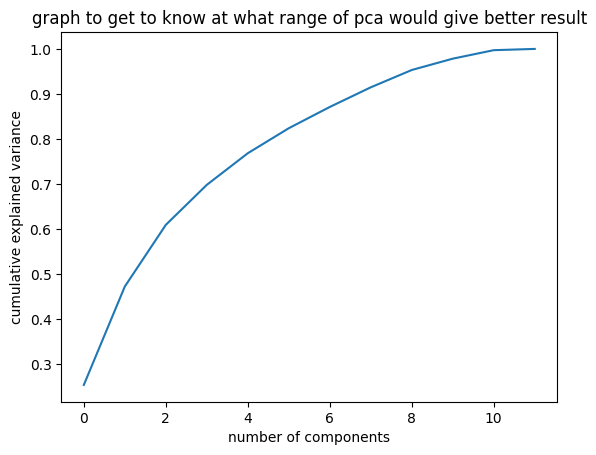

In [137]:
import matplotlib.pyplot as plt
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.title("graph to get to know at what range of pca would give better result")
plt.xlabel("number of components")
plt.ylabel("cumulative explained variance")
plt.show()